<a href="https://colab.research.google.com/github/methrex/COT5600/blob/master/hw_2/COT5600_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as p
import cmath as c
from numpy import outer,matmul
from numpy import kron as tensor
from math  import sqrt,cos,sin,pi
from cmath import e

#define and assign global variables
global ket0, ket1
global ket00, ket01, ket10, ket11
global plus, minus

ket0=np.array([1,0])
ket1=np.array([0,1])
ket00=tensor(ket0,ket0)
ket01=tensor(ket0,ket1)
ket10=tensor(ket1,ket0)
ket11=tensor(ket1,ket1)
plus=np.array([1,1])/sqrt(2)
minus=np.array([1,-1])/sqrt(2)
i=c.sqrt(-1)

In [0]:
def hadamard(control,register,U):
  #assumes U is acting on the entire register
  #this is the case for problems 1 and 2

  #build H and n x n identity 
  In=np.identity(len(register))
  H=np.transpose([plus,minus])
  H=tensor(H,In)

  #build U, build state vector
  U=tensor(outer(ket0,ket0),In)+tensor(outer(ket1,ket1),U) 
  state=tensor(control,register)

  #apply gates
  state=matmul(H,state)
  state=matmul(U,state)
  state=matmul(H,state)
  
  #initialize projector, get Prob(0)
  P=tensor(outer(ket0,ket0),In)
  prob=np.linalg.norm(matmul(P,state),ord=2)**2

  return prob

**Problem 1**
---

Unfortunately, the LaTeX rendered weirdly on github, but it looks better in Google Colab. 

$$
U=\begin{bmatrix}
cos(\phi) & sin(\phi) \\ -sin(\phi) & cos(\phi)
\end{bmatrix}
\qquad \lvert \psi \rangle =\lvert0\rangle= \begin{bmatrix} 1\\0 \end{bmatrix}
$$

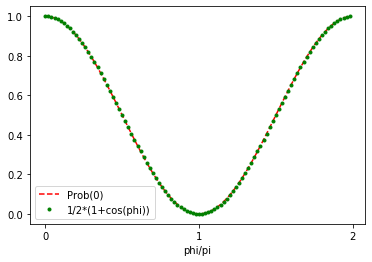

In [0]:
phi=np.arange(0,1,0.01)
phi=np.multiply(phi,2*pi)
prob=[]
for k in range(len(phi)):
  U=np.array([[cos(phi[k]),sin(phi[k])],[-sin(phi[k]),cos(phi[k])]])
  prob.append(hadamard(ket0,ket0,U))
p.plot(phi,prob,'r--',label='Prob(0)')
p.plot(phi,1/2*(1+np.cos(phi)),'g.',label='1/2*(1+cos(phi))')
p.xlabel('phi/pi')
p.xticks(np.arange(0,3*pi,pi),('0','1','2'))
p.legend()

Prob(0) = $\frac{1}{2} \big(1 + \text{Re} \langle U \rangle \big)$ 
$$
\langle 0 \lvert U \rvert 0 \rangle = \begin{bmatrix} 1 & 0 \end{bmatrix} \begin{bmatrix} \cos(\phi) \\ -\sin(\phi)\end{bmatrix} = \cos(\phi)
$$
Prob(0) = $\frac{1}{2} \big(1 + \cos(\phi) \big) \quad\forall \phi\in [0,2\pi)$, which is what we see in the graph above. 

Now we'll use 

$$
U=\begin{bmatrix} 1& 0\\0&e^{i\phi}\end{bmatrix}
$$

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


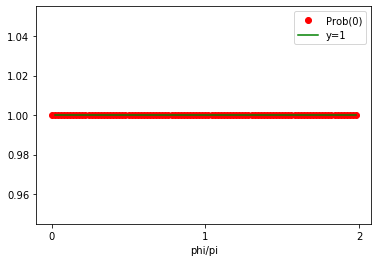

In [0]:
phi=np.arange(0,1,0.01)
phi=np.multiply(phi,2*pi)
prob=[]
for k in range(len(phi)):
  U=np.array([[1,0],[0,e**(i*phi[k])]])
  prob.append(hadamard(ket0,ket0,U))
p.plot(phi,prob,'ro',label='Prob(0)')
p.plot(phi,phi/phi,'g-',label='y=1')
p.xlabel('phi/pi')
p.xticks(np.arange(0,3*pi,pi),('0','1','2'))
p.legend()

$U\lvert0\rangle = \begin{bmatrix} 1&0\\0&e^{i\phi}\end{bmatrix} \begin{bmatrix}1\\0\end{bmatrix}=\begin{bmatrix}1\\0\end{bmatrix}=\lvert 0 \rangle\quad \forall \phi \in [0,2\pi)$

$$
\implies \langle \psi \lvert U \rvert \psi \rangle = \langle 0 \rvert U \lvert 0 \rangle = \langle 0 \rvert 0\rangle = 1
$$

Prob(0) = $\frac{1}{2} \big( 1 + \langle U\rangle\big) = 1$ is independents of $\phi$ for this matrix $U$. 

**Problem 2**
---

Our register is $\left \lvert \psi\right\rangle$ and our unitary matrix is $S$. 

\begin{align*}
U=S&=\left\lvert 00\right\rangle\langle 00\rvert + \lvert 01 \rangle\langle10\rvert + \lvert 10 \rangle \langle 01 \rvert + \lvert 11 \rangle \langle 11 \rvert
\\\\
&=\begin{bmatrix}
1&0&0&0\\0&0&1&0\\0&1&0&0\\0&0&0&1
\end{bmatrix}
\\\\
\lvert\psi\rangle&= \lvert0\rangle \otimes \bigg(\cos(\phi)\lvert 0\rangle + \sin(\phi)\lvert 1\rangle\bigg)
\\
&=\cos(\phi)\lvert00\rangle + \sin(\phi)\lvert 01\rangle
\\\\
&=\begin{bmatrix}
\cos(\phi)\\\sin(\phi)\\0\\0
\end{bmatrix}
\end{align*}

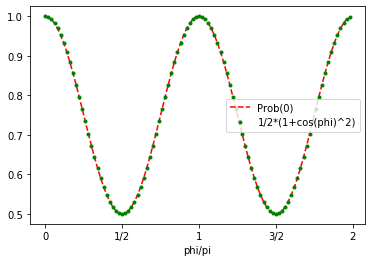

In [0]:
S=outer(ket00,ket00)+outer(ket01,ket10)+outer(ket10,ket01)+outer(ket11,ket11)
phi=np.arange(0,1,0.01)
phi=np.multiply(phi,2*pi)
prob=[]
for k in range(len(phi)):
  psi=tensor(ket0, np.multiply(cos(phi[k]),ket0)+np.multiply(sin(phi[k]),ket1))
  prob.append(hadamard(ket0,psi,S))
p.plot(phi,prob,'r--',label='Prob(0)')
p.plot(phi,1/2*(1+np.cos(phi)**2),'g.',label='1/2*(1+cos(phi)^2)')
p.xlabel('phi/pi')
p.xticks(np.arange(0,2.5*pi,0.5*pi),('0','1/2','1','3/2','2'))
p.legend()

Following the same procedure as before, Prob(0) = $\frac{1}{2}\big( 1 + \langle U \rangle\big)$

\begin{align*}
\langle U \rangle &= \begin{bmatrix} \cos(\phi) &\sin(\phi) &0&0\end{bmatrix}\begin{bmatrix}1&0&0&0\\0&0&1&0\\0&1&0&0\\0&0&0&1\end{bmatrix}\begin{bmatrix} \cos(\phi)\\\sin(\psi)\\0\\0\end{bmatrix}
\\
&=\cos^2(\phi)
\end{align*}

So, Prob(0) = $\frac{1}{2}\big(1 + \cos^2(\phi)\big)$, which is the graph we see above 